In [44]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
import matplotlib as mpl
import seaborn as sns
import pandas as pd
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10,6)

In [45]:
df = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')

/Users/mhendrickson/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
df = df.ix[:,0:18]

In [47]:
df = df.drop(df.columns[1:10], axis=1)

,DATE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
0,03/24/2017,0,0,0,0,0,0,0,0
1,03/24/2017,0,0,0,0,0,0,0,0
2,03/24/2017,0,0,0,0,0,0,0,0
3,03/24/2017,0,0,0,0,0,0,0,0
4,03/24/2017,0,0,0,0,0,0,0,0
5,03/24/2017,0,0,0,0,0,0,0,0
6,03/24/2017,0,0,0,0,0,0,0,0
7,03/24/2017,1,0,0,0,0,0,1,0
8,03/24/2017,1,0,1,0,0,0,0,0
9,03/24/2017,4,0,0,0,0,0,4,0


In [49]:
for d in range(0,1002838):
    date = df.at[d,'DATE'] 
    df.set_value(d, 'DATE', date[6:] )

In [61]:
total = 0
for d in range(0,1002838):
    if df.at[d,'DATE'] == '2017':
        total+=df.at[d,'NUMBER OF PERSONS INJURED']
print(total)

11559


In [70]:
injured = df.drop(df.columns[2:], axis=1)
killed = df.drop(df.columns[3:],axis=1)

In [76]:
killed = killed.drop(killed.columns[1],axis=1)

In [88]:
num_killed = {'2017':0,'2016':0,'2015':0,'2014':0,'2013':0,'2012':0}
for d in range(0,1002838):
    key = killed.at[d,'DATE']
    death = killed.at[d,'NUMBER OF PERSONS KILLED']
    num_killed[key]+= death

    

In [89]:
num_killed

{'2012': 137, '2013': 297, '2014': 262, '2015': 243, '2016': 235, '2017': 43}

In [107]:
test = pd.DataFrame(num_killed,index=num_killed.keys())

In [108]:
test

,2012,2013,2014,2015,2016,2017
2017,137,297,262,243,235,43
2016,137,297,262,243,235,43
2013,137,297,262,243,235,43
2015,137,297,262,243,235,43
2014,137,297,262,243,235,43
2012,137,297,262,243,235,43


In [120]:
test.drop(test.index[[1]], inplace=True)

In [126]:
test.columns=['Deaths']

In [149]:
num_killed

,Deaths
2012,137
2013,297
2014,262
2015,243
2016,235
2017,43


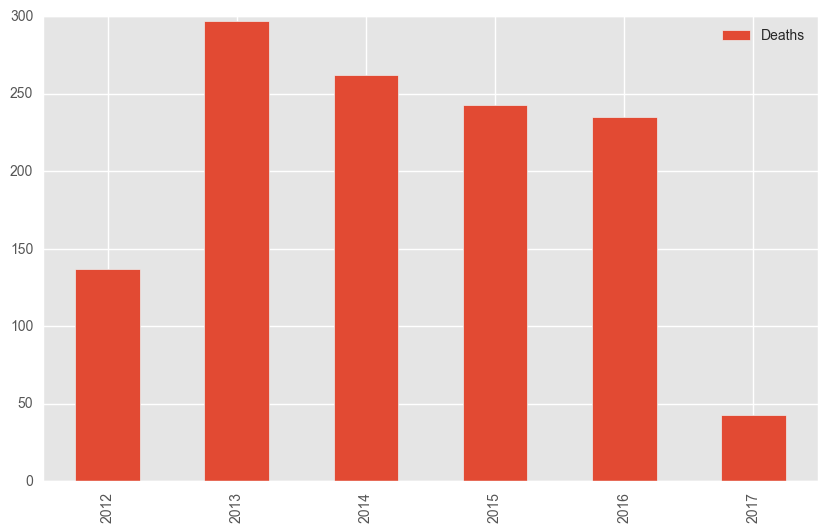

In [167]:
num_killed.plot(kind='bar')

In [168]:
injured

,DATE,NUMBER OF PERSONS INJURED
0,2017,0
1,2017,0
2,2017,0
3,2017,0
4,2017,0
5,2017,0
6,2017,0
7,2017,1
8,2017,1
9,2017,4


In [171]:
num_injured = {'2017':0,'2016':0,'2015':0,'2014':0,'2013':0,'2012':0}
for d in range(0,1002838):
    key = injured.at[d,'DATE']
    injury = injured.at[d,'NUMBER OF PERSONS INJURED']
    num_injured[key]+= injury
num_injured

{'2012': 27445,
 '2013': 55121,
 '2014': 51207,
 '2015': 51351,
 '2016': 58856,
 '2017': 11559}

In [178]:
num_injuries = pd.DataFrame(num_injured,index=num_killed.keys())

In [179]:
num_injuries

,2012,2013,2014,2015,2016,2017
Deaths,27445,55121,51207,51351,58856,11559


In [181]:
num_injuries = num_injuries.transpose()

In [187]:
num_injuries.columns=['Injuries']

In [188]:
num_injuries

,Injuries
2012,27445
2013,55121
2014,51207
2015,51351
2016,58856
2017,11559


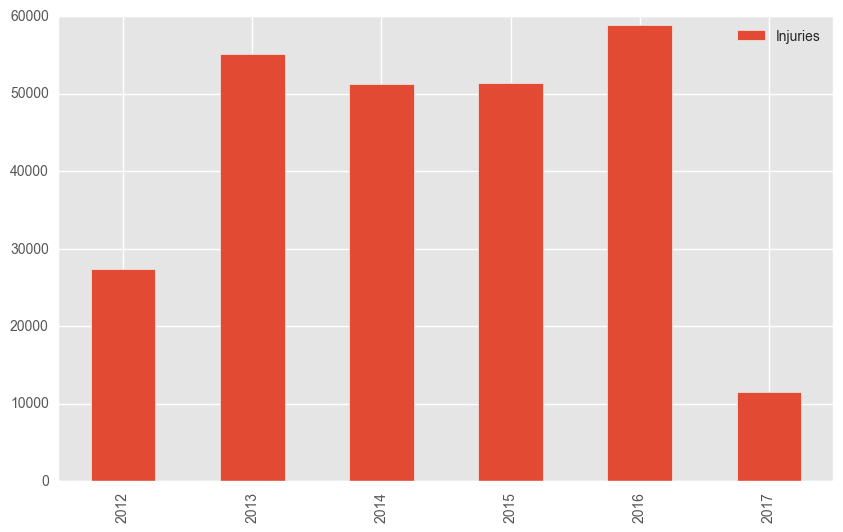

In [189]:
num_injuries.plot(kind='bar')